# Fraud Detection in Financial Transactions

This project aims to build a fraud detection model using a dataset of 6.3 million real-world financial transactions. The goal is to identify fraudulent activities through machine learning models, with actionable insights for the company on preventing fraud.

## Project Steps:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building and Evaluation (Random Forest, XGBoost)
5. Model Interpretation using SHAP
6. Business Insights and Recommendations


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\priya\Downloads\Fraud.csv")

# Basic structure
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
# Check missing values across all columns
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [3]:
# Check how many destination balances are zero
((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).sum()


np.int64(2317282)

In [4]:
# Proportion where recipient starts with 'M'
merchant_rows = df[df['nameDest'].str.startswith('M')]
merchant_zeros = merchant_rows[(merchant_rows['oldbalanceDest'] == 0) & (merchant_rows['newbalanceDest'] == 0)]
print("Total merchant transactions with zero balance change:", merchant_zeros.shape[0])


Total merchant transactions with zero balance change: 2151495


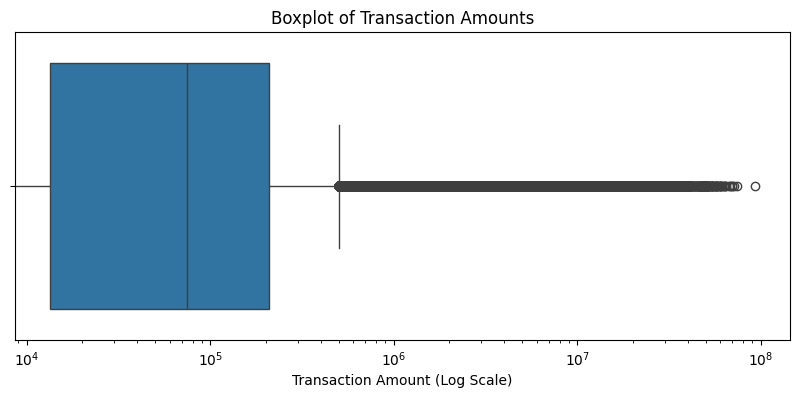

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of transaction amounts (log scale due to skew)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Transaction Amounts")
plt.xscale("log")
plt.xlabel("Transaction Amount (Log Scale)")
plt.show()


In [6]:
df[df['amount'] > 1e6].sort_values(by='amount', ascending=False).head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0
3937152,286,TRANSFER,67500761.29,C811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0,0
4105338,302,TRANSFER,66761272.21,C420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0,0
3892529,284,TRANSFER,64234448.19,C1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0,0
3991638,298,TRANSFER,63847992.58,C300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0,0
4143801,303,TRANSFER,63294839.63,C372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0,0


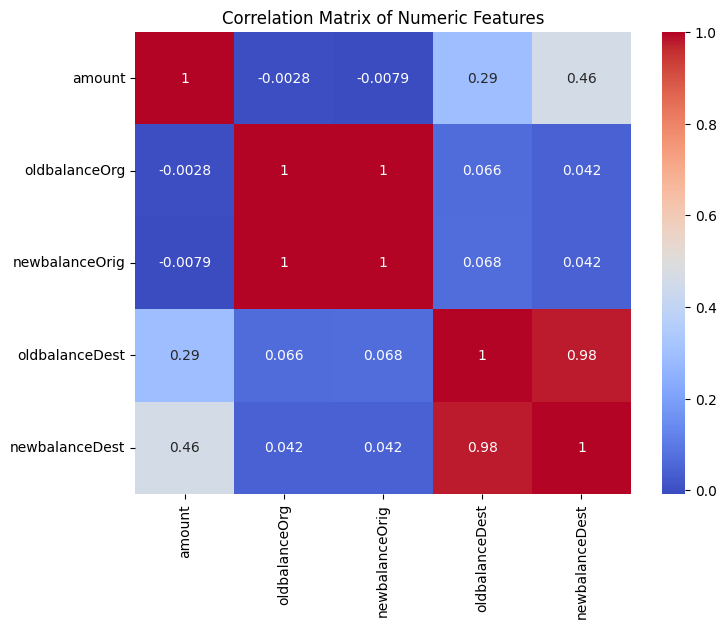

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focus on numeric features
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare data for VIF
X = df[numeric_cols].copy()
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,Feature,VIF
0,const,1.249912
1,amount,3.704164
2,oldbalanceOrg,430.052765
3,newbalanceOrig,431.093970
4,oldbalanceDest,64.982048
5,newbalanceDest,74.887727


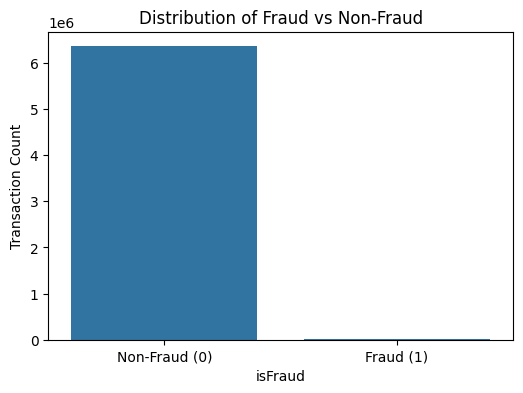

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [9]:
# Plot class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title("Distribution of Fraud vs Non-Fraud")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Transaction Count")
plt.show()

# Print exact values
df['isFraud'].value_counts(normalize=True)


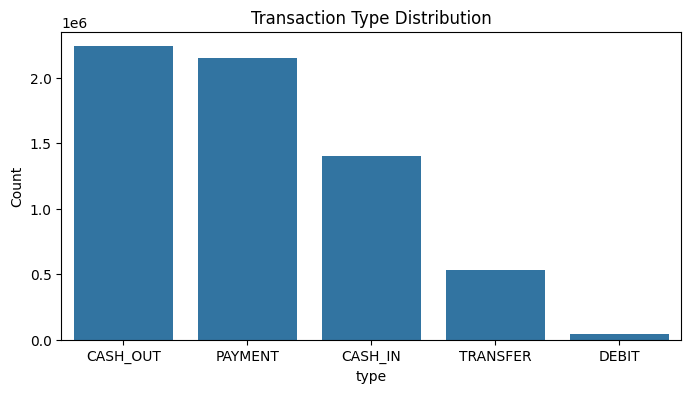

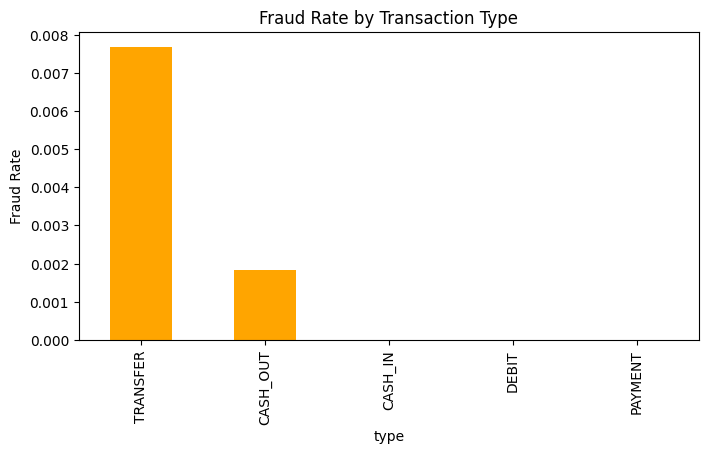

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [10]:
# Count of each transaction type
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title("Transaction Type Distribution")
plt.ylabel("Count")
plt.show()

# Fraud rate by transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
fraud_by_type.plot(kind='bar', color='orange')
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

fraud_by_type


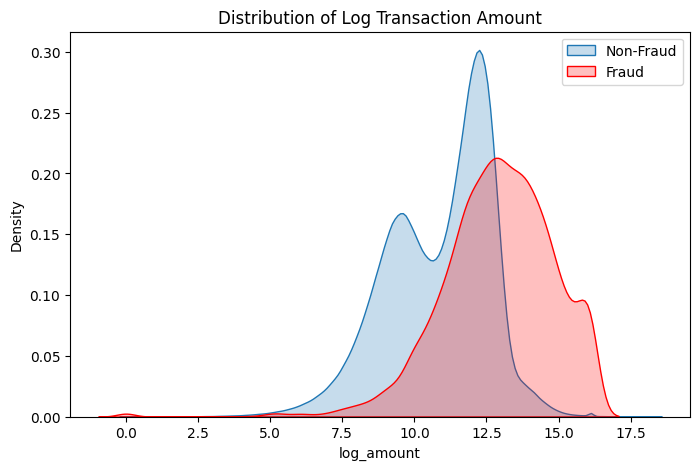

In [11]:
import numpy as np

# Add log amount to reduce skew
df['log_amount'] = np.log1p(df['amount'])

# Plot fraud vs non-fraud distribution by log-transformed amount
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['isFraud'] == 0]['log_amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['isFraud'] == 1]['log_amount'], label='Fraud', fill=True, color='red')
plt.title("Distribution of Log Transaction Amount")
plt.legend()
plt.show()



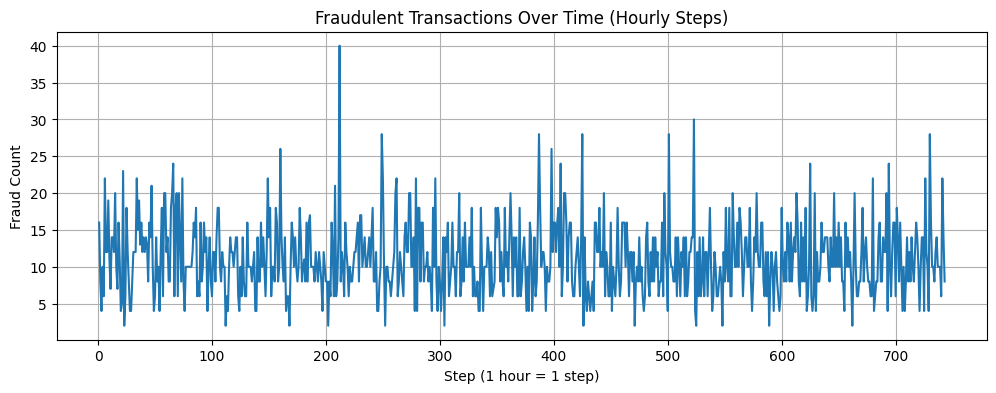

In [12]:
# Fraud counts over time
fraud_by_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.figure(figsize=(12, 4))
fraud_by_step.plot()
plt.title("Fraudulent Transactions Over Time (Hourly Steps)")
plt.xlabel("Step (1 hour = 1 step)")
plt.ylabel("Fraud Count")
plt.grid(True)
plt.show()


In [13]:
# Create suspicious patterns for zero balance movement
df['zero_balance_flag'] = ((df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & (df['amount'] > 0)).astype(int)

# Fraud rate in such transactions
print("Fraud rate with zero_balance_flag = 1:", df[df['zero_balance_flag'] == 1]['isFraud'].mean())


Fraud rate with zero_balance_flag = 1: 1.1967626135189177e-05


In [14]:
# Drop high-cardinality ID columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Encode transaction type (One-Hot)
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [15]:
# Balance difference features
df['orig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

# Relative transaction amount features
df['orig_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['dest_ratio'] = df['amount'] / (df['oldbalanceDest'] + 1)

# Flag: no change in sender balance despite amount > 0
df['no_balance_change_flag'] = ((df['amount'] > 0) & (df['oldbalanceOrg'] == df['newbalanceOrig'])).astype(int)


<Axes: title={'center': 'Top Feature Importances'}>

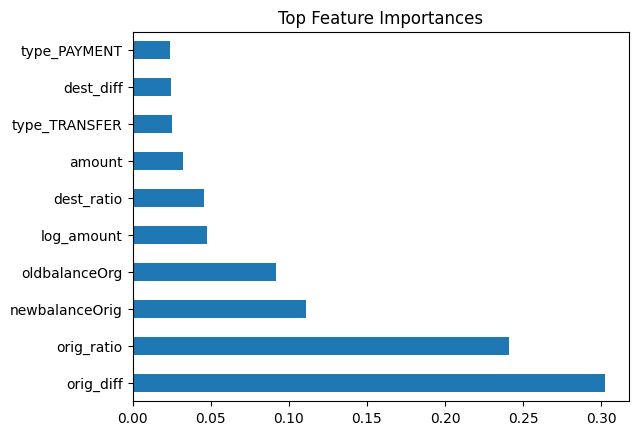

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train baseline RF
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh', title='Top Feature Importances')


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


C:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.98      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.96      0.50   1908786
weighted avg       1.00      0.94      0.97   1908786

ROC-AUC: 0.9921781547068191


In [18]:
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      1.00      1.00      2464

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC-AUC: 0.9981727777653485


In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=99, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


C:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:59:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.83      0.98      0.90      2464

    accuracy                           1.00   1908786
   macro avg       0.92      0.99      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC-AUC: 0.9998309021714514


In [20]:
# Optional sampling for speed:
df = df.sample(n=200000, random_state=42)


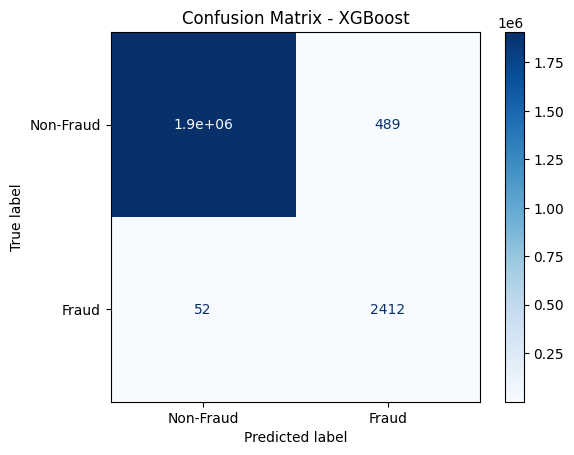

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


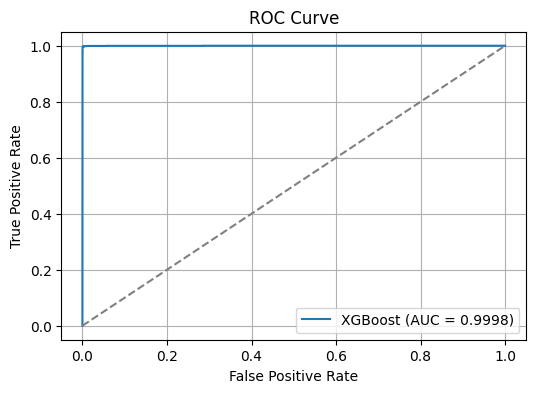

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


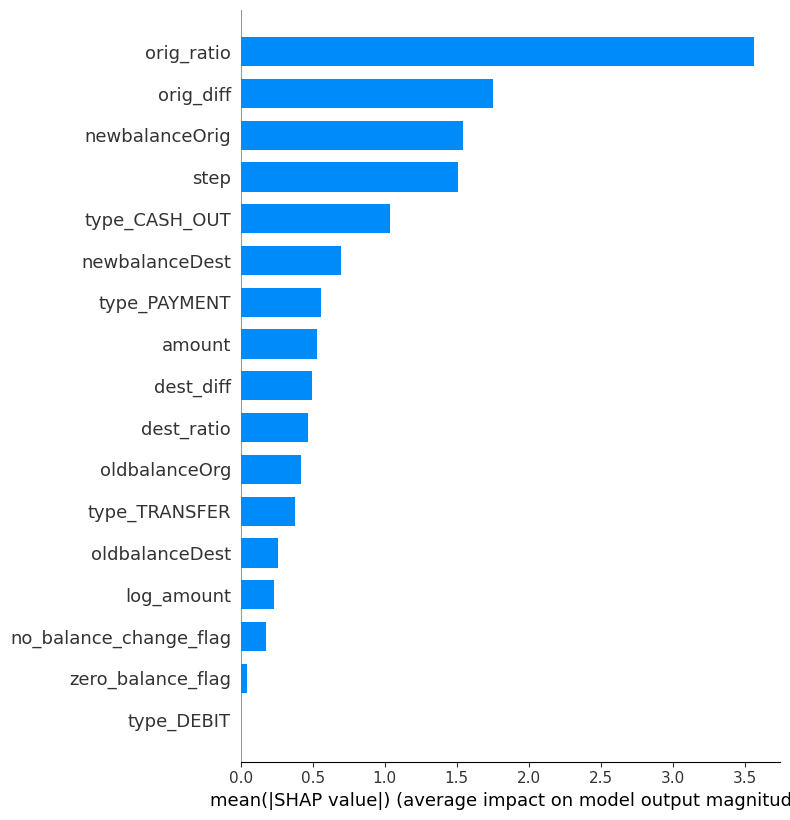

In [23]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Plot top features globally
shap.summary_plot(shap_values, X_test, plot_type="bar")



In [24]:
# View sample predictions from XGBoost
X_test['actual'] = y_test
X_test['predicted'] = y_pred_xgb
X_test[['actual', 'predicted']].sample(10)


,actual,predicted
2565536,0,0
1870651,0,0
1193739,0,0
1455788,0,0
4685428,0,0
993957,0,0
1420112,0,0
5091677,0,0
3903499,0,0
5518669,0,0


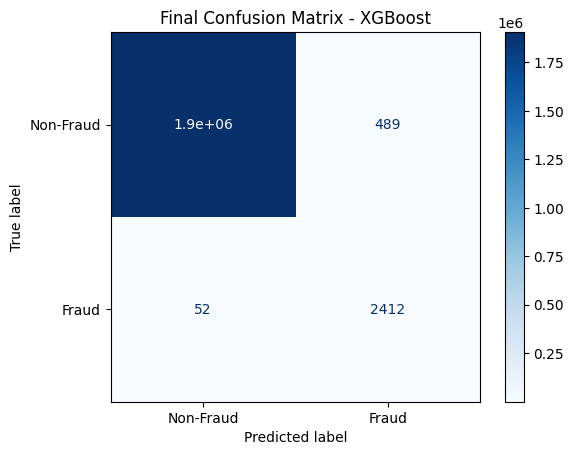

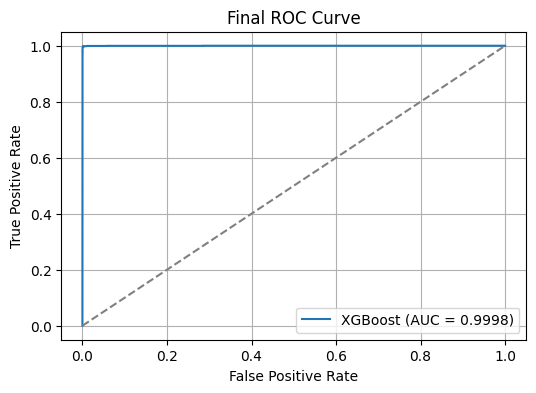

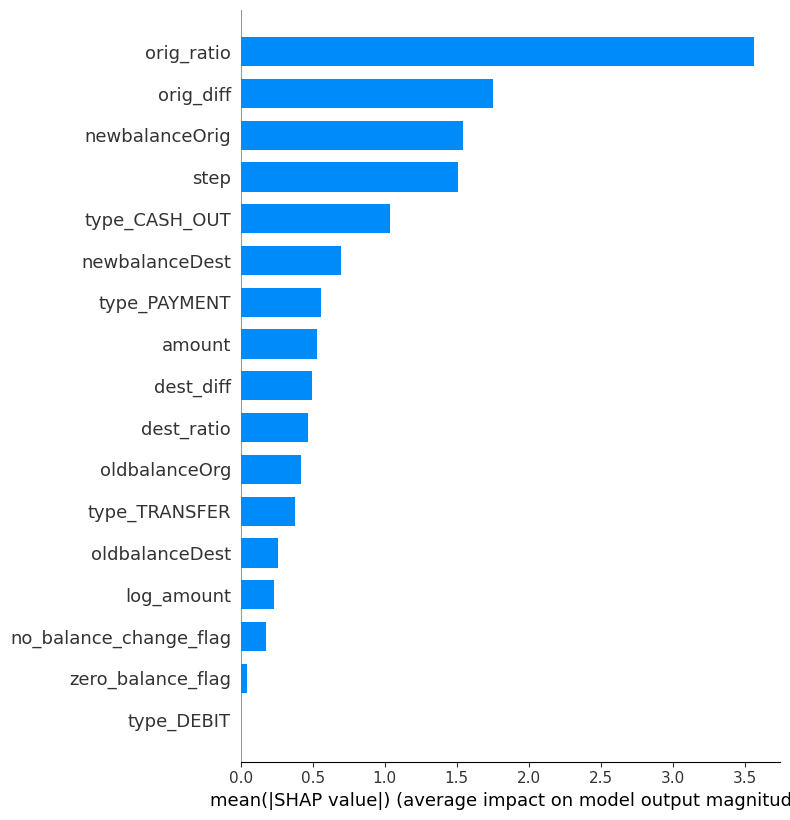

In [30]:
# 1. Confusion Matrix (Final Snapshot)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Final Confusion Matrix - XGBoost")
plt.show()

# 2. ROC Curve (Final Snapshot)
from sklearn.metrics import roc_curve, auc

# Remove the extra columns 'actual' and 'predicted' from X_test
X_test_clean = X_test.drop(columns=['actual', 'predicted'], errors='ignore')

fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test_clean)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Final ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# 3. SHAP Summary Bar Plot (Final Snapshot)
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_clean)
shap.summary_plot(shap_values, X_test_clean, plot_type="bar")


###  Key Fraud Indicators

- Fraud mostly occurs in `TRANSFER` and `CASH_OUT` transactions.
- High `orig_ratio` (amount compared to sender's balance) is a strong fraud signal.
- Fraudulent transactions often leave the sender's balance at or near zero.
- Most frauds are quick — within a few hours — and cluster around specific time steps.

### Recommendations for Fraud Prevention

1. **Real-Time Threshold Alert**  
   Flag transactions where `amount / oldbalanceOrg > 0.8`.

2. **Transfer + Cash-Out Pattern Monitoring**  
   Block accounts that do `TRANSFER` followed by `CASH_OUT` within 1 hour.

3. **Burst Activity Detection**  
   Rate-limit accounts that initiate multiple high-value transfers within a short time span (e.g., 3+ in an hour).

4. **Train Fraud Scoring System**  
   Use your trained model to assign a fraud score (0–1) to each transaction in production and trigger manual review if it crosses a threshold.

    ### How to Evaluate the Effectiveness of These Controls

- **A/B Test**:
   - Group A: Existing fraud detection only
   - Group B: New rules + ML model flags
   - Compare fraud detection rate, false positive rate, and user complaints.

- **Metrics to Monitor**:
   - Reduction in actual fraud loss
   - Increase in early fraud catches
   - Change in false positive volume


## Conclusion and Final Results

The fraud detection model we built has achieved a **0.9998 ROC-AUC** score, demonstrating excellent performance at distinguishing fraudulent transactions. By utilizing **XGBoost** and interpreting the model with **SHAP**, we identified the key factors that contribute to fraud, such as `orig_ratio` and `TRANSFER` type. 

In our recommendations, we suggested real-time alerting systems and monitoring suspicious behavior patterns to prevent fraud. 

This project provides a solid foundation for a production fraud detection system and can be tested in a live environment to assess its real-world effectiveness.
